In [1]:
import math
import time

import torch
import torch.nn as nn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import clear_output

# Warm-up: numpy

# NN using numpy

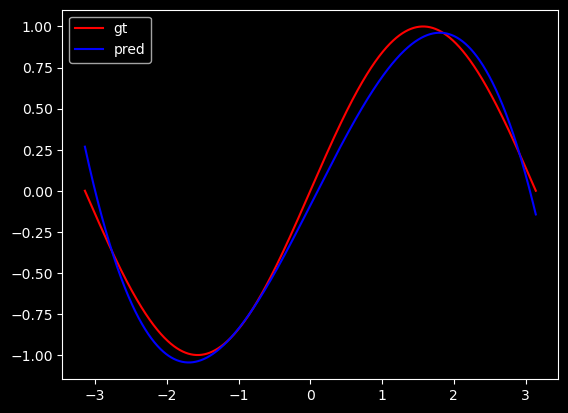

1999 13.74782914572209
Result: y = -0.07427460655041539 + 0.8592724318360861 x + 0.01281360556473448 x^2 + -0.09369048549676737 x^3


In [3]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    if t % 100 == 0:
        clear_output(wait=True)
        plt.plot(x, y, color='red', label='gt')
        plt.plot(x, y_pred, color='blue', label='pred')
        plt.legend()
        plt.show()
    # time.sleep(0.1)

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# Torch

## Tensor manipulations

In [4]:
x = np.arange(16).reshape(4, 4)
x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))  # short: x.mm(x.t())
print("mean over cols :\n%s" % torch.mean(x, dim=-1))
print("cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


In [ ]:
tensor = torch.arange(16).reshape(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([0, 1, 2, 3])
First column: tensor([ 0,  4,  8, 12])
Last column: tensor([ 3,  7, 11, 15])
tensor([[ 0,  0,  2,  3],
        [ 4,  0,  6,  7],
        [ 8,  0, 10, 11],
        [12,  0, 14, 15]])


In [ ]:
t = torch.zeros(10)
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([9., 8., 5., 9., 8., 9., 4., 8., 5., 2.])

In [ ]:
t.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
t_copy = t.clone()
t_copy.fill_(1)
t_copy

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
w = torch.Tensor([1, 0, 2, 0])
x = w.clone()

x * w

tensor([1., 0., 4., 0.])

In [ ]:
x @ w

tensor(5.)

In [ ]:
x.reshape(-1, 1)

tensor([[1.],
        [0.],
        [2.],
        [0.]])

In [ ]:
w.reshape(1, -1)

tensor([[1., 0., 2., 0.]])

In [ ]:
x.reshape(-1, 1) @ w.reshape(1, -1)

tensor([[1., 0., 2., 0.],
        [0., 0., 0., 0.],
        [2., 0., 4., 0.],
        [0., 0., 0., 0.]])

In [ ]:
x_reshaped = x.reshape(-1, 1)
x_reshaped.size()

torch.Size([4, 1])

In [ ]:
x_reshaped.shape

torch.Size([4, 1])

In [ ]:
x_reshaped.size(0)

4

In [ ]:
x_reshaped[2, 0]

tensor(2.)

In [ ]:
x_reshaped[[1,3]]

tensor([[0.],
        [0.]])

In [ ]:
x_reshaped[[1,3], :]

tensor([[0.],
        [0.]])

In [ ]:
a = torch.arange(16).reshape(4, 4)
a.transpose(0, 1)

tensor([[ 0,  4,  8, 12],
        [ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15]])

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
a.to(device)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [ ]:
a_np = a.numpy()
a_np

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### torch.tensor vs torch.Tensor

In [ ]:
torch.Tensor()

tensor([])

In [ ]:
# torch.tensor()

TypeError: tensor() missing 1 required positional arguments: "data"

In [ ]:
 torch.Tensor([1, 2, 3]).dtype

torch.float32

In [ ]:
torch.tensor([1, 2, 3]).dtype

torch.int64

### view with reshape

In [ ]:
z = torch.zeros(3, 2)
x = z.view(2, 3)
z.fill_(1)
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
z = torch.zeros(3, 2)
y = z.reshape(6)
x = z.t().reshape(6)
z.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
y

tensor([1., 1., 1., 1., 1., 1.])

In [ ]:
x

tensor([0., 0., 0., 0., 0., 0.])

torch.view merely creates a view of the original tensor. The new tensor will always share its data with the original tensor.

torch.reshape doesn't guarantee data sharing. The new tensor may be a view of the original tensor, or it may be a new tensor altogether.

In [ ]:
%pip install torchviz -q

In [ ]:
from torchviz import make_dot

In [ ]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
y = x - 2
z = y.mean()

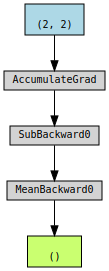

In [ ]:
make_dot(z)

In [ ]:
x.grad

In [ ]:
z.backward()
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [ ]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
y = x - 2
z = y * 3
z = z.mean()

In [ ]:
z.backward()
x.grad

tensor([[0.7500, 0.7500],
        [0.7500, 0.7500]])

In [ ]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
y = x - 2
z = y * y * 3
z = z.mean()

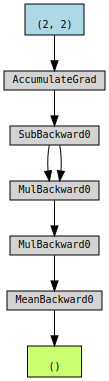

In [ ]:
make_dot(z)

In [ ]:
z.backward()
x.grad

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])

In [ ]:
y

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)

In [ ]:
x = torch.ones(5)  # input tensor
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## NN using torch

### Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grads```


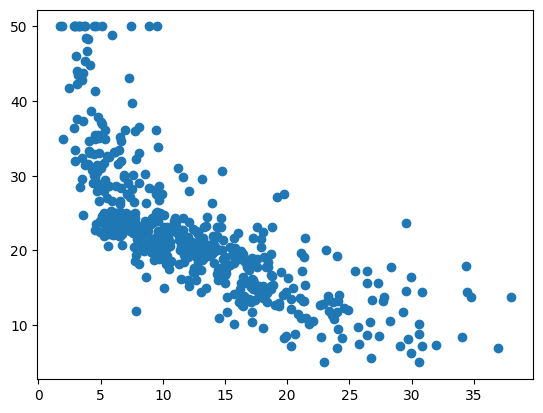

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
plt.scatter(data[:, -1], target);

In [ ]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [ ]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


dL/dw = 2 x (y_pred - y) x X

dL/db = 2 x (y_pred - y)

In [ ]:
(2.0 * (y_pred - y) * x).mean()

tensor(-47.3514, grad_fn=<MeanBackward0>)

In [ ]:
(2.0 * (y_pred - y)).mean()

tensor(-45.0656, grad_fn=<MeanBackward0>)

If you compute gradient from multiple losses, the gradients will add up at tensors, therefore it's useful to __zero the gradients__ between iteratons.

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [ ]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-94.7029])
dL/db = 
 tensor([-90.1312])


Sometimes batches are too big to shape into the GPU card. So for stohstic gradient descent you need to accumulate gradients from elements of batch.

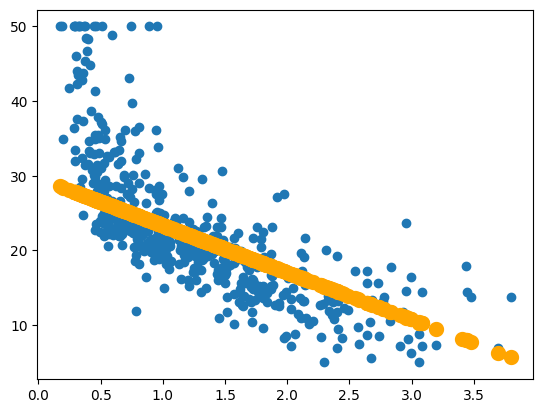

loss =  44.376724


In [ ]:

for i in range(100):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    with torch.no_grad():
        w.data = w - 0.05 * w.grad.data
        b.data = b - 0.05 * b.grad.data

        # zero gradients
        w.grad.zero_()
        b.grad.zero_()

    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.item() < 0.5:
            print("Done!")
            break

### One more time

In [ ]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


In [ ]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [ ]:
# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

In [ ]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor(-0.8121, requires_grad=True)
Parameter containing:
tensor(1.1512, requires_grad=True)
Parameter containing:
tensor(-1.0067, requires_grad=True)
Parameter containing:
tensor(0.2170, requires_grad=True)


In [ ]:
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 293.7506103515625
199 208.49415588378906
299 148.826904296875
399 107.04080200195312
499 77.76033020019531
599 57.23127365112305
699 42.830440521240234
799 32.72334671020508
899 25.62641716003418
999 20.640846252441406
1099 17.136978149414062
1199 14.673470497131348
1299 12.940744400024414
1399 11.721580505371094
1499 10.863456726074219
1599 10.259260177612305
1699 9.833721160888672
1799 9.533923149108887
1899 9.322654724121094
1999 9.173736572265625
Result: y = -0.019525952637195587 + 0.8606627583503723 x + 0.00336855067871511 x^2 + -0.09388824552297592 x^3


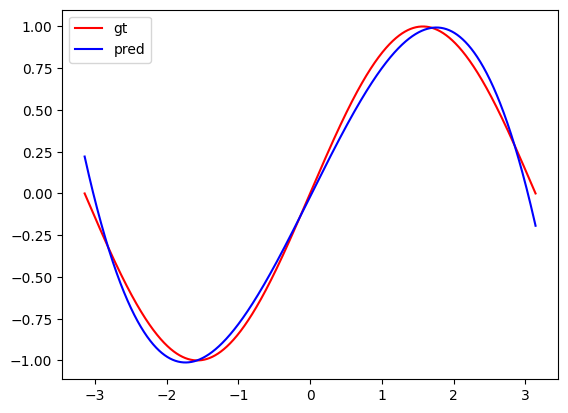

In [ ]:
plt.plot(x, y, color='red', label='gt')
plt.plot(x, y_pred.detach().numpy(), color='blue', label='pred')
plt.legend()
plt.show()